# <div class=title>   مقارنة بين أدوات التجذيع الحاسوبية في اللّغة العربية</div>
<div class=warn>في هذه التجربة نقارن بين بعض أدوات التجذيع المستخدمة للّغة العربية.</div>
<div class=warn>مبدئياً ما هو التجذيع؟</div>
<div class=warn>التجذيع هو عملية إزالة السوابق و اللواحق للحصول علي جذع مشترك بين الكلمات, يعتبر التجذيع وسيلة للحد من عدد الكلمات و الحصول علي الكلمات المتقاربة في حالة البحث. </div>
<div class=warn>فمثلا من الطبيعي أنه إذا بحثنا عن كلمة "الكتابات" نجد نتائج تشمل "الكتابة"</div>

<div class=warn>أما عن السوابق فهي الاجزاء التي تتصل لأول الكلمات و ليست جزء أصيل منها, مثل "ي" المضارعة في الأفعال, و مثل "ال" التعريف. و مثلها اللواحق و هي التي تلحق بالكلمة أي تلتصق بآخرها و ليست أصيلة فيها مثل "ات" التأنيث و غيرها.</div>
<div class=warn>السوابق و اللّواحق يشار إليهما باللّواصق.</div>

<div class=warn>يذكر أيضا, أن هناك لواصق بسيطة و هي التي تتكون من صورة واحدة من اللّواصق مثل في "الباب", و هناك لواصق معقّدة تتكون من أكثر من صورة مثل "بالباب", فههنا الباء و "ال" التعريف.</div>

<div class=warn>اعلم أن التجذيع  وظيفة مختلفة عن التجذير و هو الوصول لأصل الكلمة الصرفي.</div>
<div class=warn>فكلمة "الكتابات" و "الكتابة" و "يكتب" و "سيكتب" كلهم ينتمون <b>لنفس</b> الجذر "كتب", لكن تنتمي الكلمتان الأولتان لنفس الجذع "كتاب" و الأخرتان للجذع "كتب".</div>


<div class=warn>في البحث نناقش:</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 1. طريقة الاستخدام</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 2. الكفاءة</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 3. السرعة </div>

In [1]:
#style
import sys
sys.path.append('../../')

from style import style
style.css('../../style/style.css')

In [2]:
import matplotlib.pyplot as plt
import re
import elements
import string
import emoji
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/amr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## <div class=heading>   البيانات</div>
### <div class=sub>   قراءة البيانات</div>

<div class=warn>مصدر الحزمة: https://github.com/motazsaad/arabic-sentiment-analysis</div>

In [3]:
import numpy as np
import pandas as pd

In [4]:
pd.options.display.max_colwidth = 100

In [7]:
path = '../../../arabic-sentiment-analysis-master/arabic_tweets_txt/'

In [8]:
data = pd.read_csv(f'{path}/positive_tweets_arabic_20181206_1k.txt',sep='\t',names=['tweet'])

In [9]:
len(data)

21428

In [7]:
raw_txt = data.iloc[300].tweet
raw_txt

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك ُ ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

## <div class=heading>   المعالجات القبلية</div>


<div class=warn>نقوم بتحميل بتحميل مسبعدات الفهرسة من مكتبةNLTK.</div>

In [8]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))


<div class=warn>تقوم الدوالّ التالية بإزالة التشكيل و التطويل و مستبعدات الفهرسة و المسافات المتتالية و المسافات أول الجمل و تحول التفاعلات (إيموجي) لأوصاف مكتوبة.</div>

In [9]:
def tashkel_removal(t):
    return t.translate(t.maketrans('',"",''.join(elements.DIACRITICS)))

In [10]:
def tatweel_removal(t):
    return re.sub('ـ+', '',t)

In [11]:
def normalization(t):
    return t.translate(t.maketrans(''.join(elements.ALEF_HAMZA_FORMS+elements.NON_ALIF_HAMZA_FORMS),"اااوي"))

In [12]:
def stopwords_removal(t,stop=arb_stopwords):
    return ' '.join([word for word in t.split() if word not in stop])

In [13]:
def successive_space_removal(t):
    t=t.strip()
    return re.sub(' +', ' ',t)

In [14]:
def punctuation_removal(t):
    return t.translate(t.maketrans('',"",''.join(elements.PUNCTUATION_MARKS[:-1])+'?'))

In [15]:
def emojify(t):
    return emoji.demojize(t)

<div class=warn>نقوم بترتيب سلسلة الدوالّ للمعالجة القبلية, تغيير الترتيب قد يؤدي إلي نواتج مختلفة.</div>

In [16]:
pipeline = [stopwords_removal,tashkel_removal,tatweel_removal,punctuation_removal,
        normalization,emojify,successive_space_removal]

In [17]:
pipeline_stages = str('stopwords_removal,tashkel_removal,tatweel_removal,punctuation_removal,normalization,emojify,successive_space_removal').split(',')

<div class=warn>نقوم بحفظ النص دون معالجة قبلية</div>

In [18]:
prep_txt = raw_txt

In [19]:
prep_txt

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك ُ ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

<div class=warn>مراحل التغيير بعد كل دالّة</div>

In [20]:
for method,name in zip(pipeline,pipeline_stages):
    prep_txt= method(prep_txt)
    print(name,'-->',prep_txt)

stopwords_removal --> - يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك ُ ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕
tashkel_removal --> - يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك  ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕
tatweel_removal --> - يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك  ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕
punctuation_removal -->  يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك  ل عقلانيه مافيه شيء يدوم للأبد   👏 💕
normalization -->  يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك  ل عقلانيه مافيه شيء يدوم للابد   👏 💕
emojify -->  يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك  ل عقلانيه مافيه شيء يدوم للابد   :clapping_hands: :two_hearts:
successive_space_removal --> يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد :clapping_hands: :two_hearts:


<div class=warn>لاحظ أهمية المعالجة القبلية المخصوصة علي حسب طبيعة كل حزمة, فعلي سبيل المثال النصوص من منصة تويتر مختلفة عن النصوص من الكتب مختلفة عن المدونات.</div>

## <div class=heading>   أدوات التجذيع</div>
<div class=warn>تجربة مبدئية لكيفية عمل كل أداة تجذيع, مع تقييم لجودة العملية.</div>
<div class=warn>تعمل المكتبات علي مستويين علي حسب طبيعة كل أداة, الطريقة الأولي هي التجذيع علي مستوي النص, و الثانية علي مستوي الكلمة في النص.</div>

<div class=warn>بالتالي سنقوم باختبار كل مجذّع علي أربعة أحوال:</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 1. النص المعالج</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 2. النص الغير معالج</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 3. النص كاملا</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 4. النص كمجموعة كلمات</div>

<div class=warn>نستعامل مع أربع مكتبات توفّر خاصية التجذيع.</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 1. فراسة</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 2. تاشفين</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 3. عاصم</div>
<div class=warn> &nbsp; &nbsp; &nbsp; 4. nltk</div>


<div class=warn>الدالّة التالية تقوم بتطبيق الطريقة المرغوبة مع أي أداة تجذيع</div>

In [21]:
def stemmer_func(t, f,mode='word'):
    '''takes in the text, stemming function and the mode of operation word by word or full text'''
    if mode =='word':
        return ' '.join([f(w) for w in t.split()])
    elif mode == 'text':
        return f(t)

In [22]:
raw_txt

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك ُ ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

In [23]:
prep_txt

'يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد :clapping_hands: :two_hearts:'

### <div class=sub>   فراسة </div>

In [24]:
from farasa.stemmer import FarasaStemmer

In [25]:
frasa_stmmer = FarasaStemmer()

In [26]:
raw_txt

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك ُ ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

In [27]:
prep_txt

'يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد :clapping_hands: :two_hearts:'

In [28]:
stemmer_func(raw_txt,frasa_stmmer.stem,mode= 'text')

'- ما أهم أستمرار شيء أبد كفى أن كان مبسوط لحظة أن ب ل عقلاني مافي شيء دام أبد ! . ? ? ? ?'

In [29]:
stemmer_func(prep_txt,frasa_stmmer.stem,mode= 'text')

'أهم استمرار شيء ابد كفى ان كان مبسوط لحظة لان ب ل عقلاني مافي شيء دام ابد :clapping_hands: :two_hearts:'

In [30]:
stemmer_func(raw_txt,frasa_stmmer.stem,mode= 'word')

'- ما أهم أستمرار شيء أبد كفى أن كان مبسوط لحظة أن ب  ل عقلاني مافي شيء دام أبد ! . ? ? ? ?'

In [31]:
stemmer_func(prep_txt,frasa_stmmer.stem,mode= 'word')

'أهم استمرار شيء ابد كفى ان كان مبسوط لحظة لان ب ل عقلاني مافي شيء دام ابد :clapping_hands: :two_hearts:'

<div class=warn>الملاحظ أن فراسة تعمل علي كلا المستويين, لكن بطيئة علي مستوي الكلمة, فراسة حولت التفاعلات (إيموجي) إلي علامات استفهام و لكن لم تمس النص الأجنبي في حالة النص المُعالج.</div>
<div class=warn>و تعتبر جودة التجذيع عالية, فعلي سبيل المثال تحوّلت كلمة "يهمني" إلي "اهم" و "يكفي" إلي "كفي" و "عقلانيه" إلي "عقلاني" و "يدوم" إلي "دام" و لكن لم تحول "استمرار".</div>

### <div class=sub>   تشافين</div>

In [32]:
from tashaphyne.stemming import ArabicLightStemmer

In [33]:
tach_st = ArabicLightStemmer()

In [34]:
raw_txt

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك ُ ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

In [35]:
prep_txt

'يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد :clapping_hands: :two_hearts:'

In [36]:
stemmer_func(raw_txt,tach_st.light_stem,mode= 'text')

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك  ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

In [37]:
stemmer_func(prep_txt,tach_st.light_stem,mode= 'text')

'يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد :clapping_hands: :two_hearts:'

In [38]:
stemmer_func(raw_txt,tach_st.light_stem,mode= 'word')

'- ما هم ستمرار أشياء أبد كفي أن نت مبسوط حظ أن بك  ل عقلان ماف شيء دوم أبد ! . 👏 💕'

In [39]:
stemmer_func(prep_txt,tach_st.light_stem,mode= 'word')

'هم استمرار اشياء ابد كفي ني نت مبسوط حظ ان بك ل عقلان ماف شيء دوم ابد :clapping_hands: :two_hearts:'

<div class=warn>بالنسبة لتاشفين فتعمل علي مستوي الكلمة, و تعتبر جودتها متوسطة, فكلمة "يهمني" تحولت إلي "هم "و كلمة "يكفي" تحولت إلي "كفي" و "عقلان" إلي عقلاني" بينما لم تمس "استمرار" و أفسدت كلمة "لحظة. </div>
<div class=warn>يلاحظ أيضاً تستطيع التعمل مع التفاعلات (الإيموجي).</div>

### <div class=sub>   عاصم  </div>
<div class=warn>المصدر: https://github.com/assem-ch/arabicstemmer_pythonlibrary</div>

In [40]:
from arabicstemmer import ArabicStemmer
assem_st = ArabicStemmer()

In [41]:
stemmer_func(raw_txt,assem_st.stemWord,mode= 'text')

'- ما يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك  ل عقلانيه مافيه شيء يدوم للابد   👏 💕'

In [42]:
raw_txt

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك ُ ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

In [43]:
prep_txt

'يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد :clapping_hands: :two_hearts:'

In [44]:
stemmer_func(prep_txt,assem_st.stemWord,mode= 'text')

'يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد clapping_hands two_hearts'

In [45]:
stemmer_func(raw_txt,assem_st.stemWord,mode= 'word')

'- ما يهم استمرار اشياء ابد يكف ان كنت مبسوط لحظ لان وبك  ل عقل ماف شيء يدوم ابد   👏 💕'

In [46]:
stemmer_func(prep_txt,assem_st.stemWord,mode= 'word')

'يهم استمرار اشياء ابد يكف ان كنت مبسوط لحظ لان وبك ل عقل ماف شيء يدوم ابد clapping_hands two_hearts'

<div class=warn>مكتبة عاصم تعمل علي مستوي الكلمة و أداءها في المثال يعتبر متوسط, ففي "يهم" و "يكف" أبقي علي الياء الزائدة, و نجح في استخراج كلمة "مبسوط" و لم يمس "استمرار", و أفسدت كلمات مثل "لحظة" </div>

### <div class=sub>   NLTK</div>

In [47]:
from nltk.stem.isri import ISRIStemmer

In [48]:
nltk_st = ISRIStemmer()

In [49]:
raw_txt

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك ُ ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

In [50]:
prep_txt

'يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد :clapping_hands: :two_hearts:'

In [51]:
stemmer_func(raw_txt,nltk_st.stem,mode= 'text')

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك  ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

In [52]:
stemmer_func(prep_txt,nltk_st.stem,mode= 'text')

'يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد :clapping_hands: :two_hearts:'

In [53]:
raw_txt

'- ما يهمني أستمرار الأشياء للأبد يكفي أني كنت مبسوطه لحظتها لأنه وبك ُ ل عقلانيه مافيه شيء يدوم للأبد ! . 👏 💕'

In [54]:
prep_txt

'يهمني استمرار الاشياء للابد يكفي اني كنت مبسوطه لحظتها لانه وبك ل عقلانيه مافيه شيء يدوم للابد :clapping_hands: :two_hearts:'

In [55]:
stemmer_func(raw_txt,nltk_st.stem,mode= 'word')

'- ما يهم رار شيء ابد يكف اني كنت بسط لحظ لأن وبك  ل عقل افه شيء يدم ابد ! . 👏 💕'

In [56]:
stemmer_func(prep_txt,nltk_st.stem,mode= 'word')

'يهم رار شيء ابد يكف اني كنت بسط لحظ لنه وبك ل عقل افه شيء يدم ابد :clapping_hands: :two_hearts:'

<div class=warn>أخيراً مكتبة nltk تعمل علي مستوي الكلمة, و تستطيع التعامل مع التفاعلات, و تعتبر الأضعف في التعامل مع المثال.</div>
<div class=warn>فمثلاً تحولت "استمرار" إلي "رار" و "مبسوط" إلي "بسط" و "لحظتها" إلي "لحظ" و أبقت الياء الزائدة في "يدوم", لكن نجحت في تحويل "الاشياء" .</div>

## <div class=heading>   اختبار السرعة</div>
### <div class=sub>   تحليل الأداء</div>
<div class=warn>نقوم هاهنا باختبار سرعة تحليل كل أداة بناءً علي حجم النص نفسه</div>

In [57]:
import os
import time

In [58]:
from functools import partial

In [59]:
farasa_partial = partial(stemmer_func,f=frasa_stmmer.stem,mode='text')
tach_partial = partial(stemmer_func,f=tach_st.light_stem,mode='word')
assem_partial = partial(stemmer_func,f=assem_st.stemWord,mode='word')
nltk_partial = partial(stemmer_func,f=nltk_st.stem,mode='word')

In [60]:
stemmers = [farasa_partial,tach_partial,assem_partial,nltk_partial,]

In [83]:
t_e=[]
for i in range(len(stemmers)):
    s=time.time()
    for txt in data[:50].tweet:
        stemmers[i](txt)
    e=time.time()
    t_e.append(e-s)

<BarContainer object of 4 artists>

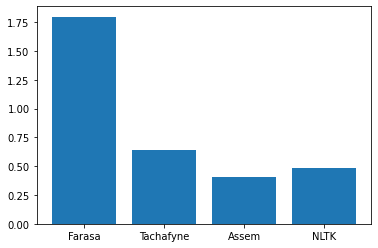

In [87]:
plt.bar(['Farasa','Tachafyne','Assem','NLTK'],np.power(t_e,1/8))

<div class=warn>تنبيه: قمنا بتطبيق عملية حسابية علي النواتج لتوضيح الصورة.</div>
<div class=warn>عام الأفضل من حيث السرعة.</div>

<div class=warn>و لكن هذه النصوص تعتبر قصيره كونه مصدرها تغريدات من تويتر, ماذا إذا كنا تعامل مع نصوص طويلة ؟</div>

In [99]:
large_data = ' '.join(list(data[:5000].tweet))

In [100]:
len(large_data)

332267

In [101]:
large_data[:1000]

'- رافق أولئك الأصدقاء . . الذين يدخلون حب الحيـاة داخل روحك ، من يثبتون لك أنك تستطيع الوقوف في كل مر ّ ة تتعثر ، من يأخذ … باليمين 😌 😌 💕 كفووك الطيب 😍 💕 💕 إذا صادفتك أزمة فليكن قلبك مطمئن بأن الله سيفرج الأزمة ويزيل الكرب لأنه رب العالمين ! ! 🙏 🏻 💕 - محمد الشعراوي كلي ندم اني ما حضرت الملتقى . . 💔 اعتقد انو الملتقى كان كوم وتقديمك الخورافي يا أنس كان كوم تاني 😂 ❤ ️ ننتظر الفلوق ع … س ُ ئل أح َ د الص َ ّ الحين أي شيء ي َ فعل الله بـ ِ ع َ بده إذا أحبه ؟ ق َ ال ي ُ لهمه إستغفار ع ِ ند الت َ ّ قصير أستغفر الله وأتوب … مساء الخيير 💕 مع متجر نون تمتع بارخص الاسعار و أجود المنتجات خصومات حتي % بمتجر نون كما أنه يوفر إليك خصم % قم بنسخ الاكواد : … في زحام من الن ِ عم . . اللهم لك الحمد ولك الشكر 🙏 🏻 💕 تم بحمدالله ختام وحدة الغذاء والانتهاء من جميع الوحدات التعليميه الاساسيه لهذا الترم تمنياتي لجميع الاطفال بالتوفيق في الدا … احلى مسااء ي شييخه 🤤 💕 اخر العنقود سكر معقود 💕 ☺ ك ُ ن ممتنا ً لكل صبآح وأنت بكامل صحتك وعافيتك وبين عائلتك 💕 لا تشكو ألما ً ولا مرضا ً ، دائما ً قل الحمدلله على نعمه ِ

In [102]:
t_e=[]
for i in range(len(stemmers)):
    s=time.time()
    stemmers[i](large_data)
    e=time.time()
    t_e.append(e-s)

<BarContainer object of 4 artists>

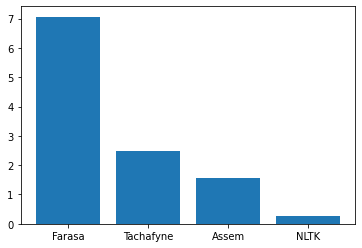

In [103]:
plt.bar(['Farasa','Tachafyne','Assem','NLTK'],t_e)

<div class=warn>مع زيادة حجم النص الواحد تقاربت السرعات نسبياً, كان أداء nltk أسرع من أداء عاصم, و لم تزل فراسة صاحبة المرتبة الأخيرة من حيص السرعة لكن أداء أفضل بكثير بالنسبة للنصوص الطويلة.</div>

## <div class=heading>   الاستنتاج</div>
<div class=warn>يمكن القول بأن فراسة هي الأداة الأفضل في عملية التجذيع لكن الأبطأ من حيث السرعة, استخدامها أنسب مع الحزم الضخمة المستخدمة التي تشبه حزم ويكيبيديا, بالنسبة لمكتبتي تاشفين و عاصم فأداؤهما متوسط و سرعة الأول أفضل من الثاني لذا يمكن أن نضع عاصم في المرتبة الثانية, و يأتي nltk أخيراً بسبب فساد أكثر من جذع أثناء تجربة الجودة.</div>
<div class=warn>بالطبع لا يمكن الحكم النهائي علي جودة الأدوات بهذه التجارب المعدودة,  لكن يمكن أن يحدد كل مستخدم طبيعة الاختبار التي يراها مناسبة للتقييم.</div>